16000
80000
5.0 seconds
(80000,)


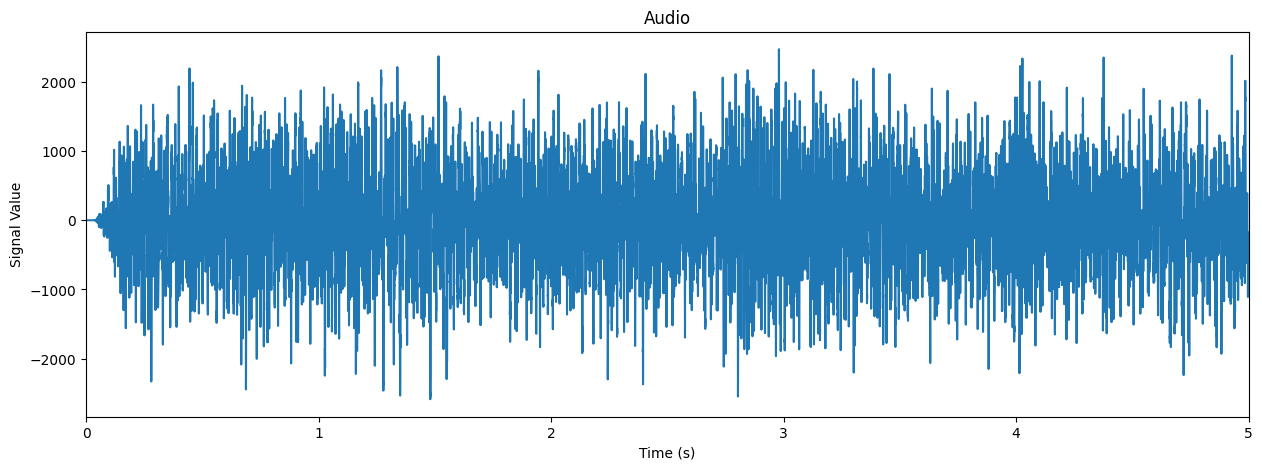

c:\Users\xdxd2\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


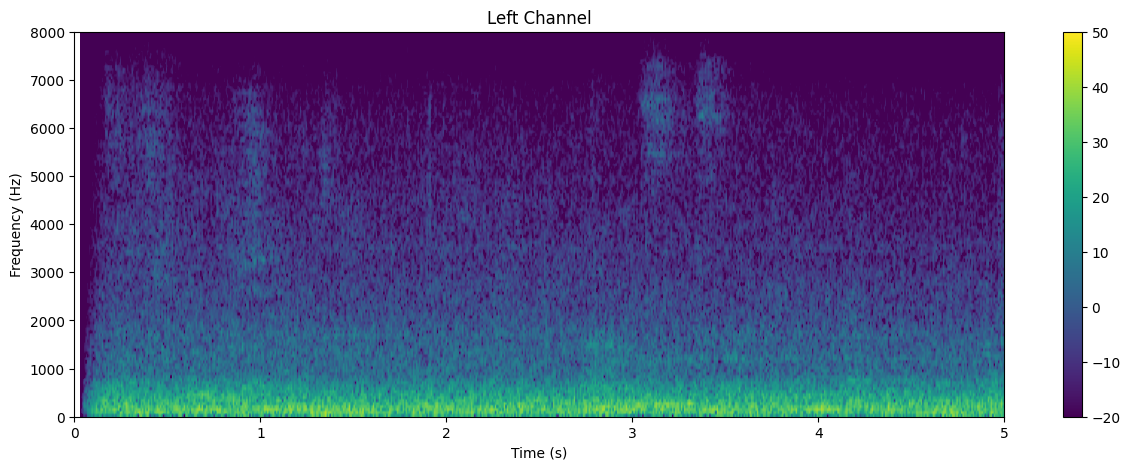

In [1]:
# https://learnpython.com/blog/plot-waveform-in-python/
import wave
import numpy as np
import matplotlib.pyplot as plt

wav_obj = wave.open('output.wav', 'r')

sample_freq = wav_obj.getframerate()
print(sample_freq)

n_samples = wav_obj.getnframes()
print(n_samples)

t_audio = n_samples/sample_freq
print(t_audio, "seconds")

signal_wave = wav_obj.readframes(n_samples)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
print(signal_array.shape)

# for stereo:
#l_channel = signal_array[0::2]
#r_channel = signal_array[1::2]

times = np.linspace(0, n_samples/sample_freq, num=n_samples)

plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title('Audio')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

plt.figure(figsize=(15, 5))
plt.specgram(signal_array, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()

採樣率: 22050
音頻長度: 5.00 秒
音頻形狀: (110250,)


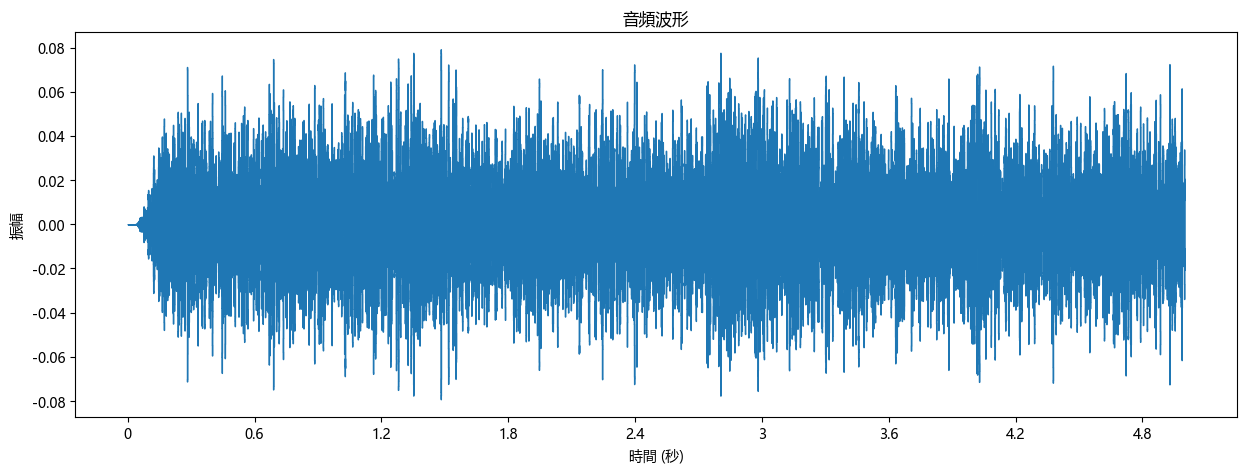

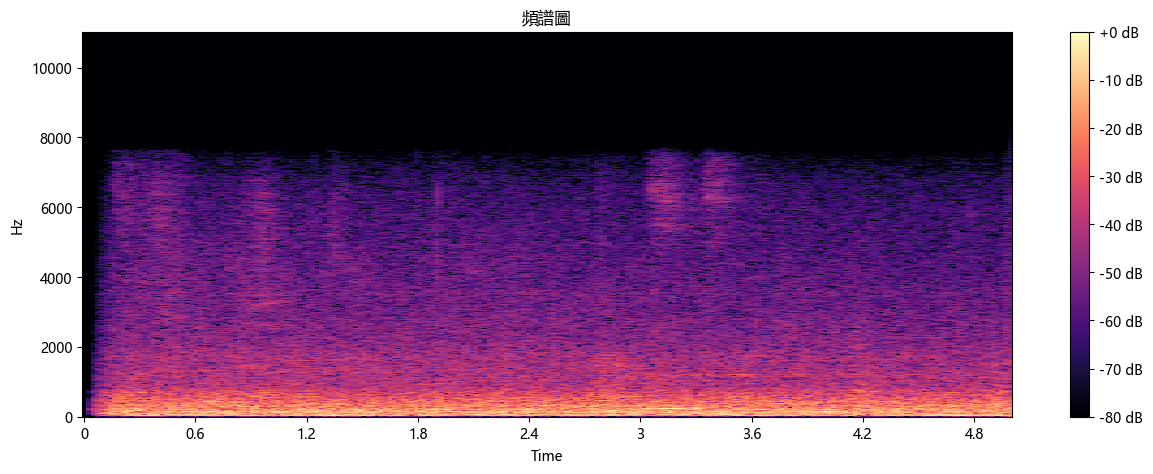

In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 設置支持中文的字體
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# 加載音頻文件
y, sr = librosa.load('output.wav')

print(f"採樣率: {sr}")
print(f"音頻長度: {len(y)/sr:.2f} 秒")
print(f"音頻形狀: {y.shape}")

# 繪製波形圖
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('音頻波形')
plt.ylabel('振幅')
plt.xlabel('時間 (秒)')
plt.show()

# 繪製頻譜圖
plt.figure(figsize=(15, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('頻譜圖')
plt.show()


